## Dataset
https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfactionm

목적: 항공사를 이용하는 고객들의 만족도를 예측하는 프로젝트

In [98]:
import pandas as pd

# .csv 파일 불러오기
test_df = pd.read_csv('./archive/test.csv') # pandas (1)
train_df = pd.read_csv('./archive/train.csv')

### 변수 설명

    id : 고객 ID
    Gender : 성별
    Customer Type : 
    Age : 나이 
    Type of Travel : 여행 유형
    Class : 좌석 클래스
    Flight Distance : 비행 거리
    Inflight wifi service : 기내 wifi 서비스
    Departure/Arrival time convenient : 이/착륙 편안함
    Ease of Online booking : 온라인 예약 편안함
    Gate location : 탑승구 위치
    Food and drink : 음식과 음료
    Online boarding : 온라인 탑승 수속
    Seat comfort : 좌석 편안함
    Inflight entertainment : 기내 엔터테인먼트
    On-board service : 기내 서비스
    Leg room service : 다리 공간 서비스
    Baggage handling : 수하물 처리
    Checkin service : 체크인 서비스
    Inflight service : 기내 서비스
    Cleanliness : 청결도
    Departure Delay in Minutes : 출발 지연 시간(분 단위)
    Arrival Delay in Minutes : 도착 지연 시간(분 단위)
    satisfaction : 만족도

### 데이터 전처리
1. 결측값 처리 

2. 중복값 확인

3. 데이터 타입 변경

4. 불필요한 변수 삭제 및 변수 명 변경

5. 범주형 데이터 처리 'Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'

6. 이상치 처리


#### 1. 결측값 처리 필요 'Arrival Delay in Minutes'

In [99]:
missing_values_test = test_df.isnull().sum()
missing_values_train = train_df.isnull().sum()

In [100]:
# test_df 결측값 확인
missing_values_test

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [101]:
# train_df 결측값 확인
missing_values_train

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [102]:
# arrival delay가 0이 아닌 데이터들 중 satisfaction의 빈도 분석
delayed_flights_train = train_df[train_df['Arrival Delay in Minutes'] > 0]
delayed_flights_test = test_df[test_df['Arrival Delay in Minutes'] > 0]

satisfaction_frequency_train = delayed_flights_train['satisfaction'].value_counts(normalize=True) * 100
satisfaction_frequency_test = delayed_flights_test['satisfaction'].value_counts(normalize=True) * 100

(satisfaction_frequency_train, satisfaction_frequency_test)


(satisfaction
 neutral or dissatisfied    61.703533
 satisfied                  38.296467
 Name: proportion, dtype: float64,
 satisfaction
 neutral or dissatisfied    61.30631
 satisfied                  38.69369
 Name: proportion, dtype: float64)

지연된 항공편에 대한 승객의 만족도가 높지 않음을 나타내며, 지연이 승객의 전반적인 만족도에 부정적인 영향을 미칠 수 있다.

그러므로, 결측값을 채울 때 빈도수,중앙값,평균으로 하기보단 다른 방법을 고려하였다.

K-최근접 이웃(K-Nearest Neighbors, KNN) 알고리즘: 유사한 기록을 가진 다른 데이터 포인트들을 찾아서, 그 유사한 데이터 포인트들의 'Arrival Delay in Minutes' 값을 평균내어 누락된 값을 추정

In [103]:
from sklearn.impute import KNNImputer

# n_neighbors 다른값 설정 가능
knn_imputer = KNNImputer(n_neighbors=5) 

# 누락된 값을 대체하기 위해 사용하고자 하는 수치 특성만을 포함하는 새로운 데이터프레임을 생성
numeric_features = ['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

train_numeric = train_df[numeric_features]
test_numeric = test_df[numeric_features]

#누락된 값 대체
train_df_imputed = knn_imputer.fit_transform(train_numeric)
test_df_imputed = knn_imputer.transform(test_numeric)

train_df[numeric_features] = train_df_imputed
test_df[numeric_features] = test_df_imputed

missing_values_after_imputation_train = pd.isnull(train_df).sum() # pandas (2)
missing_values_after_imputation_test = pd.isnull(test_df).sum()

(missing_values_after_imputation_train, missing_values_after_imputation_test)


(Unnamed: 0                           0
 id                                   0
 Gender                               0
 Customer Type                        0
 Age                                  0
 Type of Travel                       0
 Class                                0
 Flight Distance                      0
 Inflight wifi service                0
 Departure/Arrival time convenient    0
 Ease of Online booking               0
 Gate location                        0
 Food and drink                       0
 Online boarding                      0
 Seat comfort                         0
 Inflight entertainment               0
 On-board service                     0
 Leg room service                     0
 Baggage handling                     0
 Checkin service                      0
 Inflight service                     0
 Cleanliness                          0
 Departure Delay in Minutes           0
 Arrival Delay in Minutes             0
 satisfaction                         0


#### 2. 중복값 확인

In [104]:
duplicate_rows_train = train_df.duplicated().sum()
duplicate_rows_test = test_df.duplicated().sum()

duplicate_rows_train, duplicate_rows_test


(0, 0)

중복값 없음 확인

#### 3. 데이터 타입 변경

In [105]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  float64
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [106]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  float64
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [107]:
# float64 -> int64 로 변경
train_df[['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']] = train_df[['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']].astype(int)
test_df[['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']] = test_df[['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']].astype(int)

#### 4. 불필요한 변수 삭제 및 변수명 변경

In [16]:
# Unnamed: 0 열 삭제
train_df.drop('Unnamed: 0', axis=1, inplace=True)
test_df.drop('Unnamed: 0' , axis=1, inplace=True)

# id 열 삭제
train_df.drop('id', axis=1, inplace=True)
test_df.drop('id', axis=1, inplace=True)

In [17]:
# 변수명 mapping
column_rename_mapping = {
    'On-board service' : 'on_board_service',
    'Age' : 'age',
    'Gender' : 'gender',
    'Customer Type' : 'customer_type',
    'Type of Travel' : 'type_travel',
    'Class' : 'class',
    'Flight Distance' : 'flight_distance',
    'Gate location' : 'gate_location',
    'Online boarding':  'online_boarding',
    'Seat comfort' : 'seat_comfort',
    'Leg room service' : 'leg_service',
    'Baggage handling' : 'baggage_handle',
    'Checkin service' : 'checkin_service',
    'Inflight service': 'inflight_service',
    'Cleanliness' : 'cleanliness',
    'Inflight wifi service': 'wifi_service',
    'Departure/Arrival time convenient': 'time_convenient',
    'Ease of Online booking': 'booking',
    'Food and drink': 'food',
    'Inflight entertainment': 'entertainment',
    'Departure Delay in Minutes': 'departure_delay',
    'Arrival Delay in Minutes': 'arrival_delay'
}

train_df.rename(columns=column_rename_mapping, inplace=True)
test_df.rename(columns=column_rename_mapping, inplace=True)

renamed_columns_train = train_df.columns
renamed_columns_test = test_df.columns

(renamed_columns_train, renamed_columns_test)


(Index(['gender', 'customer_type', 'age', 'type_travel', 'class',
        'flight_distance', 'wifi_service', 'time_convenient', 'booking',
        'gate_location', 'food', 'online_boarding', 'seat_comfort',
        'entertainment', 'on_board_service', 'leg_service', 'baggage_handle',
        'checkin_service', 'inflight_service', 'cleanliness', 'departure_delay',
        'arrival_delay', 'satisfaction'],
       dtype='object'),
 Index(['gender', 'customer_type', 'age', 'type_travel', 'class',
        'flight_distance', 'wifi_service', 'time_convenient', 'booking',
        'gate_location', 'food', 'online_boarding', 'seat_comfort',
        'entertainment', 'on_board_service', 'leg_service', 'baggage_handle',
        'checkin_service', 'inflight_service', 'cleanliness', 'departure_delay',
        'arrival_delay', 'satisfaction'],
       dtype='object'))

#### 5. 범주형 데이터 처리 'class', 'gender', 'customer_tyoe', 'tyoe_travel', 'satisfaction'

'class' 순서형 인코딩 (등급이므로)

In [18]:
from sklearn.preprocessing import OrdinalEncoder

# 'Eco'를 0, 'Eco Plus'를 1, 'Business'를 2로 할당
class_order = ['Eco', 'Eco Plus', 'Business']

ordinal_encoder = OrdinalEncoder(categories=[class_order])

train_df['class'] = ordinal_encoder.fit_transform(train_df[['class']])
test_df['class'] = ordinal_encoder.transform(test_df[['class']])

encoded_class_train = train_df[['class']].head()
encoded_class_test = test_df[['class']].head()

(encoded_class_train, encoded_class_test)


(   class
 0    1.0
 1    2.0
 2    2.0
 3    2.0
 4    2.0,
    class
 0    0.0
 1    2.0
 2    0.0
 3    2.0
 4    0.0)

'gender' 레이블 인코딩 male : 0, female : 1

In [19]:
train_df['gender'] = train_df['gender'].astype('category')
test_df['gender'] = test_df['gender'].astype('category')

train_df['gender'] = train_df['gender'].cat.codes
test_df['gender'] = test_df['gender'].cat.codes


encoded_gender_train = train_df['gender'].head()
encoded_gender_test = test_df['gender'].head()

(encoded_gender_train, encoded_gender_test)


(0    1
 1    1
 2    0
 3    0
 4    1
 Name: gender, dtype: int8,
 0    0
 1    0
 2    1
 3    1
 4    0
 Name: gender, dtype: int8)

customer_type 레이블 인코딩 '0'은 'Loyal Customer', '1'은 'disloyal Customer'

In [20]:
train_df['customer_type'] = train_df['customer_type'].astype('category')
test_df['customer_type'] = test_df['customer_type'].astype('category')

train_df['customer_type'] = train_df['customer_type'].cat.codes
test_df['customer_type'] = test_df['customer_type'].cat.codes


encoded_customer_type_train = train_df['customer_type'].head()
encoded_customer_type_test = test_df['customer_type'].head()

(encoded_customer_type_train, encoded_customer_type_test)

(0    0
 1    1
 2    0
 3    0
 4    0
 Name: customer_type, dtype: int8,
 0    0
 1    0
 2    1
 3    0
 4    0
 Name: customer_type, dtype: int8)

type_travel 레이블 인코딩  '0'은 'Business travel', '1'은 'Personal Travel'

In [21]:
train_df['type_travel'] = train_df['type_travel'].astype('category')
test_df['type_travel'] = test_df['type_travel'].astype('category')

train_df['type_travel'] = train_df['type_travel'].cat.codes
test_df['type_travel'] = test_df['type_travel'].cat.codes

# Display the encoded values for 'Type of Travel'
encoded_type_travel_train = train_df['type_travel'].head()
encoded_type_travel_test = test_df['type_travel'].head()

(encoded_type_travel_train, encoded_type_travel_test)


(0    1
 1    0
 2    0
 3    0
 4    0
 Name: type_travel, dtype: int8,
 0    0
 1    0
 2    0
 3    0
 4    0
 Name: type_travel, dtype: int8)

staisfaction 인코딩

In [22]:
# 한번만 실행
satisfaction_mapping = {'satisfied': 1, 'neutral or dissatisfied': 0}
train_df['satisfaction'] = train_df['satisfaction'].map(satisfaction_mapping)
test_df['satisfaction'] = test_df['satisfaction'].map(satisfaction_mapping)
test_df[['satisfaction']].head()


,satisfaction
0,1
1,1
2,0
3,1
4,1


#### 6. 이상치 처리

    1. z-score 가 3 이상인 데이터들 확인

In [23]:
from scipy import stats
import numpy as np

# 숫자데이터의 열이름을 반환
numerical_cols = train_df.select_dtypes(include=[np.number]).columns.tolist() # numpy (1)

# z-socre 산정
z_scores = np.abs(stats.zscore(train_df[numerical_cols])) # scipy (1), numpy (2)

# 이상치 값 산정
outliers = (z_scores > 3).sum()
outliers


gender                 0
customer_type          0
age                   17
type_travel            0
class                  0
flight_distance       58
wifi_service           0
time_convenient        0
booking                0
gate_location          0
food                   0
online_boarding        0
seat_comfort           0
entertainment          0
on_board_service       0
leg_service            0
baggage_handle         0
checkin_service        0
inflight_service       3
cleanliness            0
departure_delay     2222
arrival_delay       2251
satisfaction           0
dtype: int64

1. age 같은 경우 7-85세로 있으므로 이상치로 고려 할 필요 X
2. flight_distance 4230 이상인 데이터를 이상치로 고려  
3. inflight_service 에 0인 데이터가 있음  
4. departure, arrival dealay 따로 확인 필요  

    2.flight_distance 시각화

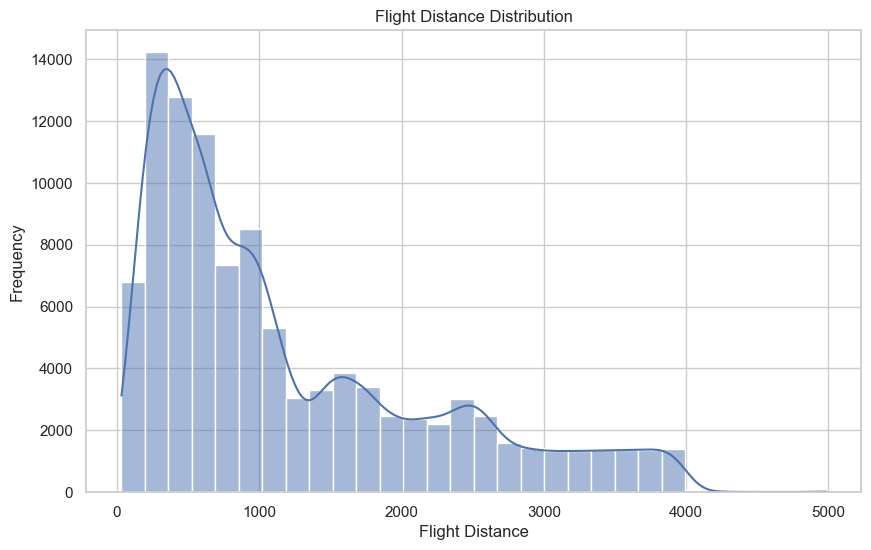

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid") # seaborn (1)

plt.figure(figsize=(10, 6)) # matplotlib (1)
sns.histplot(train_df['flight_distance'], bins=30, kde=True) # seaborn (2)
plt.title('Flight Distance Distribution') # matplotlib (2)
plt.xlabel('Flight Distance') # matplotlib (3) 
plt.ylabel('Frequency') 
plt.show()

flight_distance 4230 이상인 데이터(58개) 따로 처리 필요

    비행거리 범위에 따른 순서형 인코딩

    단거리 비행 (Short-haul): 보통 500 mile(약 800 km) 이하의 비행 -> 1  
    중거리 비행 (Medium-haul): 대략 500-1500 mile(약 800-2400 km) 사이의 비행 -> 2  
    장거리 비행 (Long-haul): 일반적으로 1500 mile (약 2400 km) 이상의 비행 -> 3

In [25]:
# train_df
train_df.loc[train_df['flight_distance'] <= 500, 'flight_distance'] = 1
train_df.loc[(train_df['flight_distance'] > 500) & (train_df['flight_distance'] <= 1500), 'flight_distance'] = 2
train_df.loc[train_df['flight_distance'] > 1500, 'flight_distance'] = 3

test_df.loc[test_df['flight_distance'] <= 500, 'flight_distance'] = 1
test_df.loc[(test_df['flight_distance'] > 500) & (test_df['flight_distance'] <= 1500), 'flight_distance'] = 2
test_df.loc[test_df['flight_distance'] > 1500, 'flight_distance'] = 3

    3. inflight_service 0인 데이터 단순 데이터 오류라 볼 수 있음
     제거해도 무방하나 knn 알고리즘으로 채우기

In [78]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

inflight_zero_indices = train_df[train_df['inflight_service'] == 0].index

features = train_df.columns.difference(['inflight_service'])
features_data = train_df[features]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_data)

nn_model = NearestNeighbors(n_neighbors=5)
nn_model.fit(features_scaled)

neighbors = nn_model.kneighbors(features_scaled[inflight_zero_indices], return_distance=False)

inflight_service_replacements = train_df.iloc[neighbors.flatten()]['inflight_service']

average_inflight_service = inflight_service_replacements.values.reshape(-1, 5).mean(axis=1)

original_and_replacements = pd.DataFrame({
    'Original Inflight Service': train_df.loc[inflight_zero_indices, 'inflight_service'],
    'Replacement Inflight Service': average_inflight_service
}) # pandas (3)

original_and_replacements


,Original Inflight Service,Replacement Inflight Service
466,0,0.8
51397,0,0.8
88714,0,0.8


inflight_service :1,2,3,4,5 로 구성 되어있으므로 0.8 -> 1로 

In [27]:
train_df['inflight_service'] = train_df['inflight_service'].replace(0.8, 1)

    4. departure, arrival delay 시각화 (box plot)

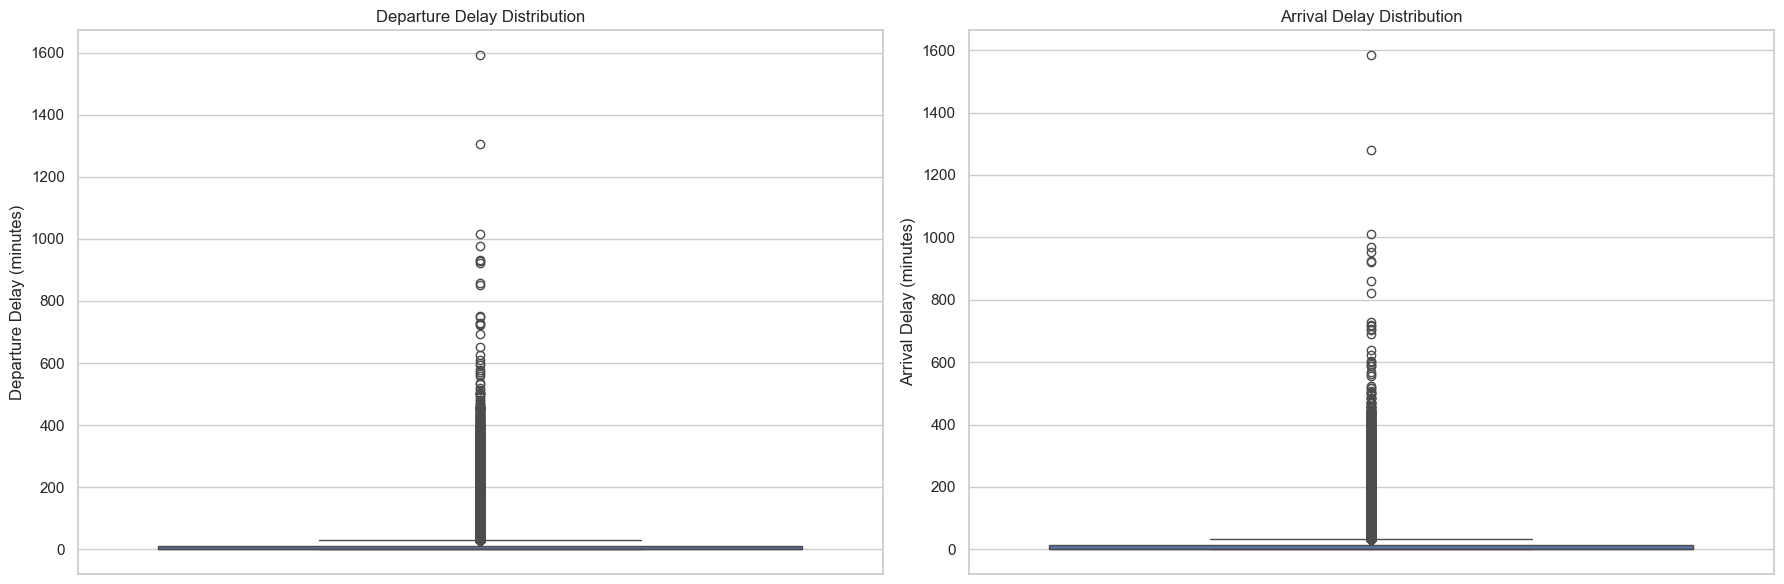

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Departure Delay
sns.boxplot(y=train_df['departure_delay'], ax=ax[0]) # seaborn (3)
ax[0].set_title('Departure Delay Distribution')
ax[0].set_ylabel('Departure Delay (minutes)')

# Arrival Delay
sns.boxplot(y=train_df['arrival_delay'], ax=ax[1])
ax[1].set_title('Arrival Delay Distribution')
ax[1].set_ylabel('Arrival Delay (minutes)')

plt.tight_layout()
plt.show()


    연착 시간에 따른 순서형 인코딩  
    
    delay
    0-60 min    -> 1.1   
    60-120 min  -> 1.2   
    120-180 min -> 1.3  
    180-360 min -> 2   
    360+ min    -> 3   

In [29]:
# train_df

# departure_delay
train_df.loc[train_df['departure_delay'] <= 60,'departure_delay'] = 1.1
train_df.loc[(train_df['departure_delay'] > 60) & (train_df['departure_delay'] <= 120),'departure_delay'] = 1.2
train_df.loc[(train_df['departure_delay'] > 120) & (train_df['departure_delay'] <= 180),'departure_delay'] = 1.3
train_df.loc[(train_df['departure_delay'] > 180) & (train_df['departure_delay'] <= 360),'departure_delay'] = 2
train_df.loc[train_df['departure_delay'] > 360,'departure_delay'] = 3

# arrival_delay
train_df.loc[train_df['arrival_delay'] <= 60,'arrival_delay'] = 1.1
train_df.loc[(train_df['arrival_delay'] > 60) & (train_df['arrival_delay'] <= 120),'arrival_delay'] = 1.2
train_df.loc[(train_df['arrival_delay'] > 120) & (train_df['arrival_delay'] <= 180),'arrival_delay'] = 1.3
train_df.loc[(train_df['arrival_delay'] > 180) & (train_df['arrival_delay'] <= 360),'arrival_delay'] = 2
train_df.loc[train_df['arrival_delay'] > 360,'arrival_delay'] = 3

train_df

C:\Users\gdeok\AppData\Local\Temp\ipykernel_10816\2821611231.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.1' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  train_df.loc[train_df['departure_delay'] <= 60,'departure_delay'] = 1.1
C:\Users\gdeok\AppData\Local\Temp\ipykernel_10816\2821611231.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.1' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  train_df.loc[train_df['arrival_delay'] <= 60,'arrival_delay'] = 1.1


,gender,customer_type,age,type_travel,class,flight_distance,wifi_service,time_convenient,booking,gate_location,...,entertainment,on_board_service,leg_service,baggage_handle,checkin_service,inflight_service,cleanliness,departure_delay,arrival_delay,satisfaction
0,1,0,13,1,1.0,1,3,4,3,1,...,5,4,3,4,4,5,5,1.1,1.1,0
1,1,1,25,0,2.0,1,3,2,3,3,...,1,1,5,3,1,4,1,1.1,1.1,0
2,0,0,26,0,2.0,2,2,2,2,2,...,5,4,3,4,4,4,5,1.1,1.1,1
3,0,0,25,0,2.0,2,2,5,5,5,...,2,2,5,3,1,4,2,1.1,1.1,0
4,1,0,61,0,2.0,1,3,3,3,3,...,3,3,4,4,3,3,3,1.1,1.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,23,0,0.0,1,2,1,2,3,...,2,3,1,4,2,3,2,1.1,1.1,0
103900,1,0,49,0,2.0,3,4,4,4,4,...,5,5,5,5,5,5,4,1.1,1.1,1
103901,1,1,30,0,2.0,3,1,1,1,3,...,4,3,2,4,5,5,4,1.1,1.1,0
103902,0,1,22,0,0.0,2,1,1,1,5,...,1,4,5,1,5,4,1,1.1,1.1,0


In [30]:
# test_df

# departure_delay
test_df.loc[test_df['departure_delay'] <= 60,'departure_delay'] = 1.1
test_df.loc[(test_df['departure_delay'] > 60) & (test_df['departure_delay'] <= 120),'departure_delay'] = 1.2
test_df.loc[(test_df['departure_delay'] > 120) & (test_df['departure_delay'] <= 180),'departure_delay'] = 1.3
test_df.loc[(test_df['departure_delay'] > 180) & (test_df['departure_delay'] <= 360),'departure_delay'] = 2
test_df.loc[test_df['departure_delay'] > 360,'departure_delay'] = 3

# arrival_delay
test_df.loc[test_df['arrival_delay'] <= 60,'arrival_delay'] = 1.1
test_df.loc[(test_df['arrival_delay'] > 60) & (test_df['arrival_delay'] <= 120),'arrival_delay'] = 1.2
test_df.loc[(test_df['arrival_delay'] > 120) & (test_df['arrival_delay'] <= 180),'arrival_delay'] = 1.3
test_df.loc[(test_df['arrival_delay'] > 180) & (test_df['arrival_delay'] <= 360),'arrival_delay'] = 2
test_df.loc[test_df['arrival_delay'] > 360,'arrival_delay'] = 3

test_df

C:\Users\gdeok\AppData\Local\Temp\ipykernel_10816\2137217927.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.1' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  test_df.loc[test_df['departure_delay'] <= 60,'departure_delay'] = 1.1
C:\Users\gdeok\AppData\Local\Temp\ipykernel_10816\2137217927.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.1' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  test_df.loc[test_df['arrival_delay'] <= 60,'arrival_delay'] = 1.1


,gender,customer_type,age,type_travel,class,flight_distance,wifi_service,time_convenient,booking,gate_location,...,entertainment,on_board_service,leg_service,baggage_handle,checkin_service,inflight_service,cleanliness,departure_delay,arrival_delay,satisfaction
0,0,0,52,0,0.0,1,5,4,3,4,...,5,5,5,5,2,5,5,1.1,1.1,1
1,0,0,36,0,2.0,3,1,1,3,1,...,4,4,4,4,3,4,5,1.1,1.1,1
2,1,1,20,0,0.0,1,2,0,2,4,...,2,4,1,3,2,2,2,1.1,1.1,0
3,1,0,44,0,2.0,3,0,0,0,2,...,1,1,1,1,3,1,4,1.1,1.1,1
4,0,0,49,0,0.0,2,2,3,4,3,...,2,2,2,2,4,2,4,1.1,1.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,1,1,34,0,2.0,2,3,3,3,1,...,4,3,2,4,4,5,4,1.1,1.1,0
25972,1,0,23,0,2.0,2,4,4,4,4,...,4,4,5,5,5,5,4,1.1,1.1,1
25973,0,0,17,1,0.0,2,2,5,1,5,...,2,4,3,4,5,4,2,1.1,1.1,0
25974,1,0,14,0,2.0,2,3,3,3,3,...,4,3,2,5,4,5,4,1.1,1.1,1


In [96]:
from scipy.stats import pearsonr, spearmanr

# 사용자 정의 함수
def correlation(x, y):
    pearson=pearsonr(x, y)[0] # scipy (2)
    spearman=spearmanr(x, y)[0] # scipy (3)

    print('Pearson correlation:', pearson)
    print('Spearman correlation:', spearman)

correlation(train_df['entertainment'], train_df['cleanliness'])

Pearson correlation: 0.6918146374078189
Spearman correlation: 0.6805062127799583


In [31]:
# 중간 저장
train_df.to_csv('./archive/p_train.csv', index=False)
test_df.to_csv('./archive/p_test.csv', index=False)

### 모델링

1. 그래디언트 부스팅(Gradient Boosting XGboost)
2. 랜덤 포레스트 (Random Forest)
3. 로지스틱 회귀 (Logistic Regression)
4. KNN (k-Nearest Neighbors)

In [32]:
# 중간저장 불러오기
import pandas as pd
train_df = pd.read_csv('./archive/p_train.csv')
test_df = pd.read_csv('./archive/p_test.csv')

In [41]:
# 필요한 라이브러리 설치
#!pip3 install xgboost

   ---------------------------------------- 0.0/101.2 MB ? eta -:--:--
   ---------------------------------------- 0.4/101.2 MB 11.2 MB/s eta 0:00:09
   ---------------------------------------- 0.9/101.2 MB 11.3 MB/s eta 0:00:09
    --------------------------------------- 1.4/101.2 MB 11.1 MB/s eta 0:00:10
    --------------------------------------- 1.6/101.2 MB 9.3 MB/s eta 0:00:11
    --------------------------------------- 2.0/101.2 MB 9.3 MB/s eta 0:00:11
   - -------------------------------------- 2.7/101.2 MB 10.2 MB/s eta 0:00:10
   - -------------------------------------- 3.3/101.2 MB 10.5 MB/s eta 0:00:10
   - -------------------------------------- 4.0/101.2 MB 11.0 MB/s eta 0:00:09
   - -------------------------------------- 4.6/101.2 MB 11.2 MB/s eta 0:00:09
   -- ------------------------------------- 5.2/101.2 MB 11.3 MB/s eta 0:00:09
   -- ------------------------------------- 5.8/101.2 MB 11.7 MB/s eta 0:00:09
   -- ------------------------------------- 6.3/101.2 MB 11.6 

In [34]:
# 모델링할 데이터셋 분리
import pandas as pd

# 훈련 데이터에서 특성(X) 및 목표 변수(y) 분리
X_train = train_df.drop('satisfaction', axis=1).to_numpy()
y_train = train_df['satisfaction']

# 테스트 데이터에서 특성(X) 및 목표 변수(y) 분리
X_test = test_df.drop('satisfaction', axis=1).to_numpy()
y_test = test_df['satisfaction']

    1. 그래디언트 부스팅 (Gradient Boosting XGBoost)

In [83]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# XGBoost 분류기 초기화
xgb_model = XGBClassifier(
    # GridSearch를 수행하여 최적을 파라미터를 찾아 적용
    learning_rate= 0.1, 
    max_depth=7,
    n_estimators=160,
    min_child_weight = 3, 
    gamma=0.1,
    reg_alpha= 0,
    reg_lambda=0.1,    
    subsample= 1.0,
    colsample_bytree= 0.8,
    scale_pos_weight= 1
)

# 모델 훈련 및 검증 세트에서 평가
xgb_model.fit(X_train, y_train)

# 예측
y_pred = xgb_model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred) # sklearn.metrics (1)
precision = precision_score(y_test, y_pred) # sklearn.metrics (2)
recall = recall_score(y_test, y_pred) # sklearn.metrics (3)
f1 = f1_score(y_test,y_pred, average='macro')

# Accuracy
print(f'accuracny: {accuracy:.5f}') 

# Precision
print(f'precision: {precision:.5f}')

# Recall
print(f'recall: {recall:.5f}')

# f1-score 출력
print(f"f1-score  : {f1:.5f}")

accuracny: 0.96431
precision: 0.97360
recall: 0.94431
f1-score  : 0.96365


    2. 랜덤 포레스트 (Random Forest)

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# Random Forest 초기화
rf1 = RandomForestClassifier(n_estimators =100, max_depth=12,
                            min_samples_leaf = 8, min_samples_split = 8,
                            random_state =11, n_jobs = -1)

# 모델 훈련 및 검증 세트 평가
rf1.fit(X_train, y_train)

# 예측
y_pred =rf1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred, average='macro')

# Accuracy
print(f'accuracny: {accuracy:.5f}')

# Precision
print(f'precision: {precision:.5f}')

# Recall
print(f'recall: {recall:.5f}')

# f1-score 출력
print(f"f1-score  : {f1:.5f}")

Accuracy score of model : 0.952726
F1 score of model : 0.951923


    3. Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# 로지스틱 회귀 모델 생성
model = LogisticRegression(max_iter=500)

# 모델 학습
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred, average='macro')

# Accuracy
print(f'accuracny: {accuracy:.5f}')

# Precision
print(f'precision: {precision:.5f}')

# Recall
print(f'recall: {recall:.5f}')

# f1-score 출력
print(f"f1-score  : {f1:.5f}")


Accuracy: 0.87030
F1 score of model: 0.8677


    4. KNN (k-최근접 이웃)

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score

# KNN 모델 생성 및 훈련
knn = KNeighborsClassifier(algorithm='brute', n_neighbors=7, metric='manhattan', weights='distance')
knn.fit(X_train, y_train)

# 예측
knn_pred = knn.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred, average='macro')

# Accuracy
print(f'accuracny: {accuracy:.5f}')

# Precision
print(f'precision: {precision:.5f}')

# Recall
print(f'recall: {recall:.5f}')

# f1-score 출력
print(f"f1-score  : {f1:.5f}")

5NN Score: 0.9292
F1 score of model: 0.9278


    5. 앙상블 모델 (Soft Voting)

In [108]:
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#1 XGBoosting
xgb_clf = XGBClassifier(
    learning_rate= 0.1, 
    max_depth=7,
    n_estimators=160,
    min_child_weight = 3, 
    gamma=0.1,
    reg_alpha= 0,
    reg_lambda=0.1,    
    subsample= 1.0,
    colsample_bytree= 0.8,
    scale_pos_weight= 1
)

#2 RandomForest
rf_clf = RandomForestClassifier(
    n_estimators =100, 
    max_depth=12,
    min_samples_leaf=8, 
    min_samples_split=8,
    random_state=11, 
    n_jobs=-1
)

#3 Logistic Regression
lr_clf = LogisticRegression(
    max_iter=500
)


#4 KNN
knn_clf = KNeighborsClassifier(
            n_neighbors=7, 
            metric='manhattan', 
            weights='distance'
)

# Ensemble Classifier
voting_clf=VotingClassifier(
    estimators=[('xgb', xgb_clf), 
                ('rf', rf_clf), 
                ('knn', knn_clf), 
                ('lr', lr_clf)
                ], 
    voting='soft')

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=0.1,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate...
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=160, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('rf',
                              RandomForestClassifier(max_depth=12,
                                                     min_samples_leaf=8,
                                                     min_samples_split=8,
                                                     n_jobs=-1,
                                                     random_state=11)),
                             ('knn',
                              KNeighborsClassifier(metric='manhattan',
                                                   n_neighbors=7,
                                                   weights='distance')),
                             ('lr', LogisticRegression(max_iter=500))],
                 voting='soft')

In [109]:
# 최종 모델링 및 평가
from sklearn.metrics import accuracy_score, f1_score

def modeling_eval(X_test):
    y_pred=voting_clf.predict(X_test)
    
    # 모델 평가
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test,y_pred, average='macro')

    # Accuracy
    print(f'accuracny: {accuracy:.5f}')
    # Precision
    print(f'precision: {precision:.5f}')
    # Recall
    print(f'recall: {recall:.5f}')
    # f1-score
    print(f"f1-score: {f1:.5f}")

    return y_pred

In [110]:
y_pred=modeling_eval(X_test)
y_pred

accuracny: 0.95373
precision: 0.96137
recall: 0.93204
f1-score: 0.95286


array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

### TensorFlow & Keras

In [74]:
#!pip install tensorflow

In [67]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

In [75]:
# Sequential 모델 생성
model = Sequential()

# 레이어 추가
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))  # 입력 차원 설정 및 활성화 함수 설정
model.add(BatchNormalization())  # 배치 정규화 추가
model.add(Dropout(0.5))  # 드롭아웃 추가 (50% 비율)

model.add(Dense(256, activation='relu'))  # Dense 레이어 추가 및 활성화 함수 설정
model.add(BatchNormalization())  # 배치 정규화 추가
model.add(Dropout(0.5))  # 드롭아웃 추가 (50% 비율)

model.add(Dense(128, activation='relu'))  # Dense 레이어 추가 및 활성화 함수 설정
model.add(BatchNormalization())  # 배치 정규화 추가
model.add(Dropout(0.5))  # 드롭아웃 추가 (50% 비율)

model.add(Dense(64, activation='relu'))  # Dense 레이어 추가 및 활성화 함수 설정
model.add(BatchNormalization())  # 배치 정규화 추가
model.add(Dropout(0.5))  # 드롭아웃 추가 (50% 비율)

model.add(Dense(32, activation='relu'))  # Dense 레이어 추가 및 활성화 함수 설정
model.add(BatchNormalization())  # 배치 정규화 추가
model.add(Dropout(0.5))  # 드롭아웃 추가 (50% 비율)

model.add(Dense(1, activation='sigmoid'))  # 출력 레이어 추가 및 활성화 함수 설정


C:\Users\gdeok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [76]:
# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 모델 학습
history = model.fit(X_train, y_train, epochs=100, batch_size=32, 
                    validation_split=0.2, 
                    callbacks=[early_stopping])

# 테스트 세트에서 모델 평가
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# 정확도
accuracy = accuracy_score(y_test, y_pred)
print(f'정확도: {accuracy:.5f}')

# F1 점수
f1 = f1_score(y_test, y_pred)
print(f'F1 점수: {f1:.5f}')


Epoch 1/100
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7519 - loss: 0.5281 - val_accuracy: 0.9062 - val_loss: 0.2307
Epoch 2/100
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8811 - loss: 0.2940 - val_accuracy: 0.9261 - val_loss: 0.1876
Epoch 3/100
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8910 - loss: 0.2672 - val_accuracy: 0.9303 - val_loss: 0.1739
Epoch 4/100
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8979 - loss: 0.2527 - val_accuracy: 0.9370 - val_loss: 0.1599
Epoch 5/100
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9015 - loss: 0.2420 - val_accuracy: 0.9415 - val_loss: 0.1494
Epoch 6/100
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9069 - loss: 0.2340 - val_accuracy: 0.9390 - val_loss: 0.1560
Epoch 7/100
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9061 - loss: 0.2365 - val_accuracy: 0.9329 - val_loss: 0.1618
Epoch 8/100
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9050 - loss: 

### 예측

In [72]:
# submission.csv

# 밑 코드는 0: 'neutral or dissatisfied', 1: 'satisfaction' 으로 매핑해주는 코드이다. 상황에 따라 사용
# y_pred = pd.Series(y_pred).map({0: 'neutral or dissatisfied', 1: 'satisfaction'})

submission_df = pd.DataFrame({'Prediction': y_pred})

# submission.csv 저장
submission_df.to_csv('./archive/submission.csv', index=False)